In [ ]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

import plotly.offline as pyo

pyo.init_notebook_mode()

import plotly.express as px

fig = px.bar(pingees.species.value_counts().reset_index(), x='species', y='count')
fig.show(renderer="png") 

pingees.species.value_counts()
pingees.species.value_counts().reset_index()

fig = px.histogram(pingees, x="flipper_length_mm")
fig.show(renderer="png") 

fig = px.histogram(pingees, x="species")
fig.show(renderer="png") 

pingees.dtypes

fig = px.box(pingees, x="flipper_length_mm") # or change orientation by using "y"
fig.show(renderer="png")

fig = px.box(pingees, x="species", y="flipper_length_mm")
fig.show(renderer="png")

fig = px.histogram(pingees, color="species", x="flipper_length_mm")
fig.show(renderer="png")

fig = px.box(pingees, x="species", y="flipper_length_mm", points="all")
fig.show(renderer="png")

fig = px.box(pingees, x="species", y="flipper_length_mm", points="all")
fig.show(renderer="png")


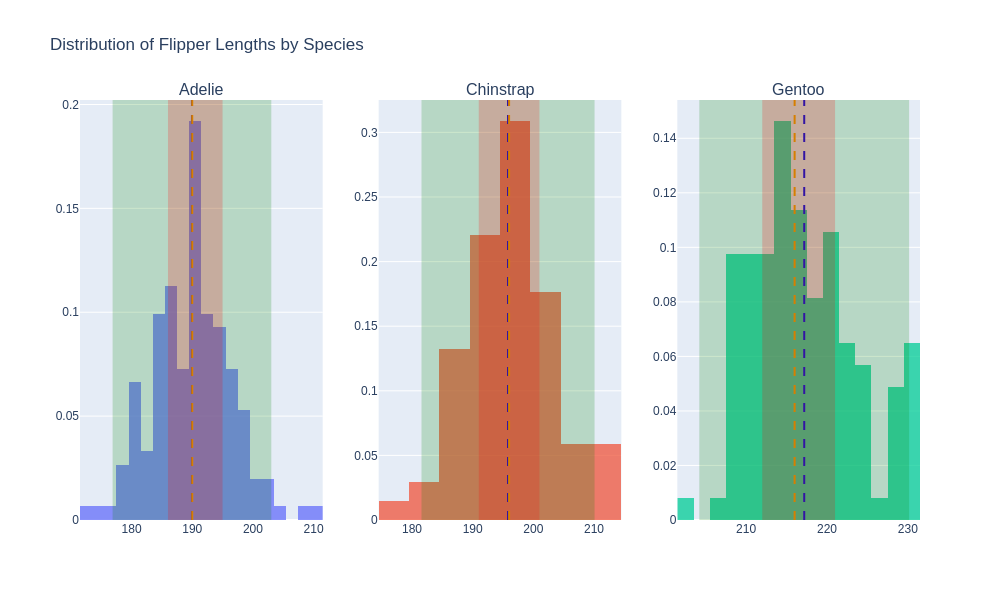

In [2]:
# Task 1
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Create subplots (1 row, 3 columns for 3 species)
fig = make_subplots(rows=1, cols=3, subplot_titles=penguins['species'].unique())

# Loop through species and create a plot for each
for i, species in enumerate(penguins['species'].dropna().unique()):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Add histogram
    fig.add_trace(
        go.Histogram(x=species_data, name=species, opacity=0.75, histnorm='probability'),
        row=1, col=i+1
    )
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std_dev = species_data.std()
    iqr_25 = species_data.quantile(0.25)
    iqr_75 = species_data.quantile(0.75)
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line_width=2, line_color="blue", line_dash="dash", row=1, col=i+1)
    fig.add_vline(x=median, line_width=2, line_color="orange", line_dash="dash", row=1, col=i+1)

    # Add shaded region for ±2 standard deviations
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, 
                  fillcolor="green", opacity=0.2, line_width=0, row=1, col=i+1)

    # Add shaded region for IQR
    fig.add_vrect(x0=iqr_25, x1=iqr_75, 
                  fillcolor="red", opacity=0.2, line_width=0, row=1, col=i+1)
    
# Update layout
fig.update_layout(title_text="Distribution of Flipper Lengths by Species", 
                  showlegend=False, height=600, width=1000)

# Show the plot
fig.show(renderer="png")


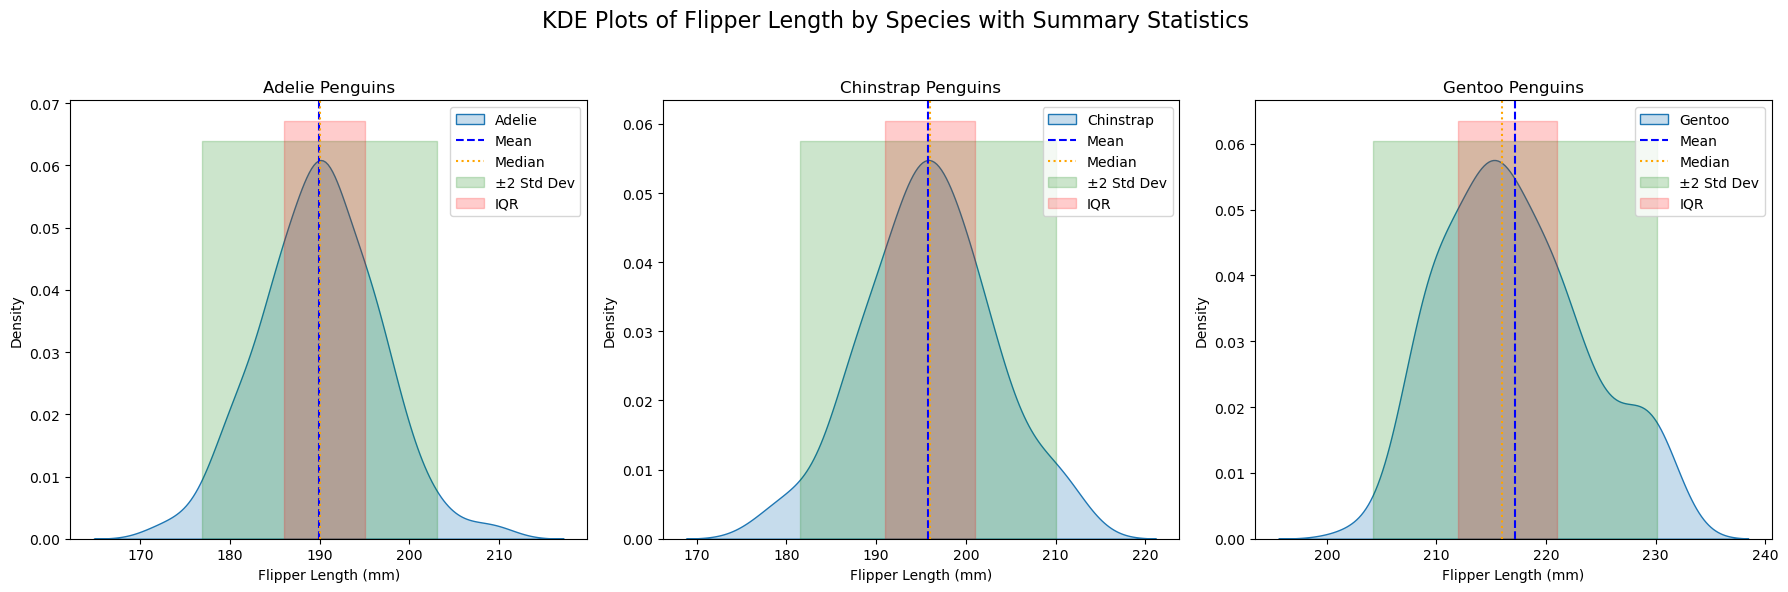

In [3]:
# Task2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Set up figure and axes for a 1x3 layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each species and create KDE plots
for i, species in enumerate(penguins['species'].dropna().unique()):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Create KDE plot for each species
    sns.kdeplot(species_data, ax=axes[i], fill=True, label=species)
    axes[i].set_title(f'{species} Penguins')
    axes[i].set_xlabel('Flipper Length (mm)')
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std_dev = species_data.std()
    iqr_25 = species_data.quantile(0.25)
    iqr_75 = species_data.quantile(0.75)

    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median, color='orange', linestyle=':', label='Median')

    # Add shaded region for ±2 standard deviations
    axes[i].fill_betweenx(np.linspace(0, axes[i].get_ylim()[1], 100), mean - 2 * std_dev, mean + 2 * std_dev, 
                          color='green', alpha=0.2, label='±2 Std Dev')

    # Add shaded region for IQR
    axes[i].fill_betweenx(np.linspace(0, axes[i].get_ylim()[1], 100), iqr_25, iqr_75, 
                          color='red', alpha=0.2, label='IQR')

    # Add legend
    axes[i].legend()

# Set a common title for the entire figure
plt.suptitle('KDE Plots of Flipper Length by Species with Summary Statistics', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()


3. I personally prefer the histogram. It is simple, easy to read and shows a good amount of data especially helps with understanding the frequency of data and getting an idea of what the distribution shape is like.It can also make it easier to spot gaps in the data and making assumptions from the data when observing where the histogram peaks or drops.


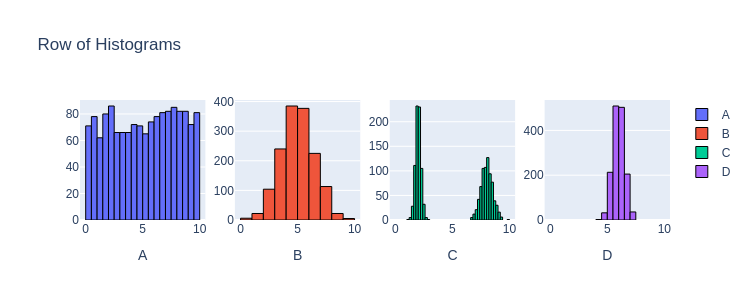

In [8]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

fig.show(renderer="png") 

4. 1- None have both similar means and similar variances.
   2- Datasets 1, 2 and 3 have similar means that are close to 5 but different variances because the data is spread out in very different ways.
   3- Datasets 2 and 4 have similar variances but different means as dataset two's mean is approximately 5 while dataset four's mean looks slighty larger than 5 .
   4-Datasets 1 and 4 have very different means and variances.


   https://chatgpt.com/share/66f61b48-d764-8000-8cab-00a8aac5883e


5. The relationship between the mean and median and right and left skewness is interesting. When it comes to right skewness (aka positive skewness), the right side of the distribution is longer/fatter. This means that the mean is larger than the median because the larger numbers pull the mean upwards on the right side. When it comes to left skewness (aka negative skewness), the left side is longer/fatter due to the median being larger than the mean and the smaller values pull the mean down to the left. 

   restaurant id  category id  item id  serving size (oz)  calories  \
0           1000          100        0                4.8       300   
1           1000          100        1                4.8       250   
2           1000          100        2                3.9       370   
3           1000          100        3                5.7       450   
4           1000          100        4                5.7       400   

   calories from fat total fat (g)  total fat (% daily value)  \
0              120.0          13.0                       20.0   
1               70.0           8.0                       12.0   
2              200.0          23.0                       35.0   
3              250.0          28.0                       43.0   
4              210.0          23.0                       35.0   

   saturated fat (g)  saturated fat (% daily value)  ...  carbohydrates (g)  \
0                5.0                           25.0  ...                 31   
1                3.0    

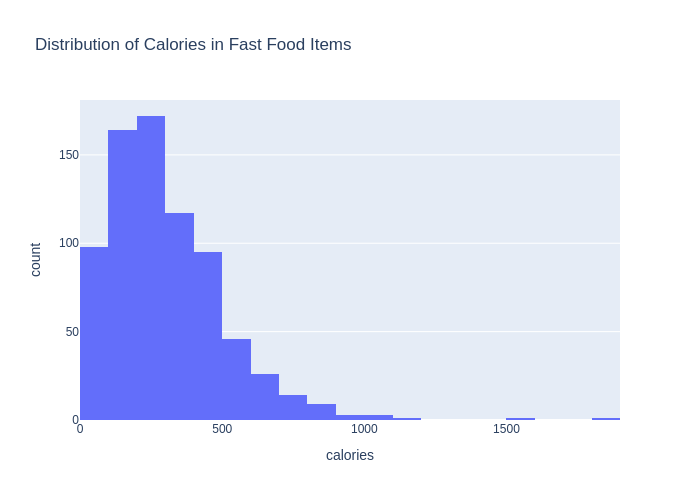

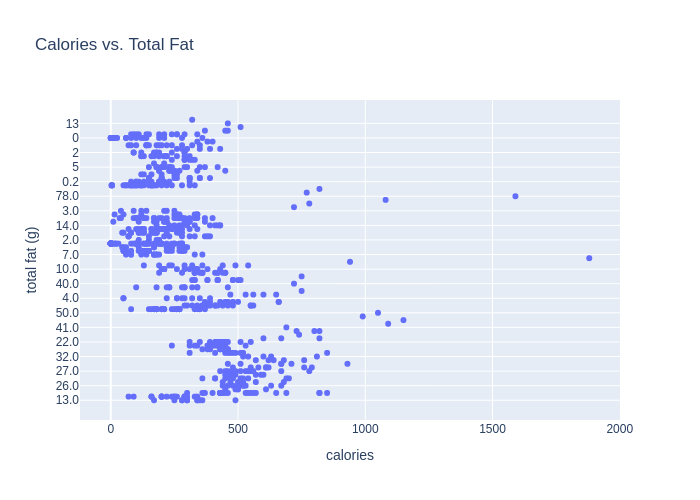

In [2]:
# Task 6

import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Create a histogram of calories
fig = px.histogram(df, x='calories', title='Distribution of Calories in Fast Food Items', nbins=30)
fig.show(renderer="png")

# Create a scatter plot of calories vs. total fat
fig2 = px.scatter(df, x='calories', y='total fat (g)', title='Calories vs. Total Fat')
fig2.show(renderer="png")



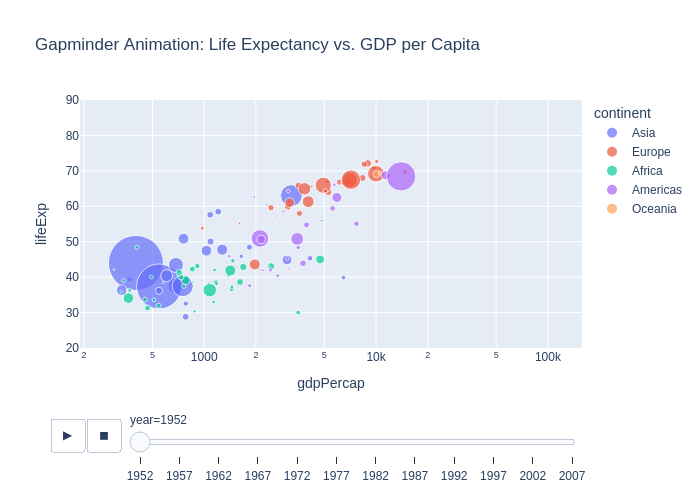

In [6]:
# Task7

import pandas as pd
import plotly.express as px

df = px.data.gapminder()
fig = px.scatter(df, x='gdpPercap', y='lifeExp', animation_frame='year', animation_group='country', size='pop', color='continent', hover_name='country', log_x=True, title='Gapminder Animation: Life Expectancy vs. GDP per Capita', range_y=[20, 90], size_max=60)
fig.show(renderer="png")


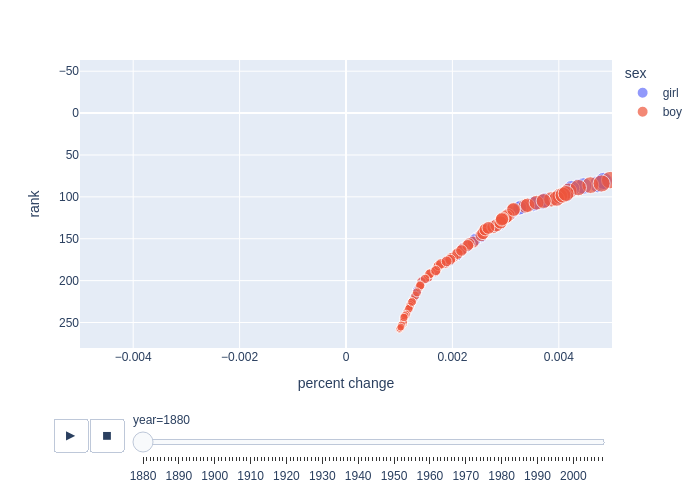

In [7]:
# Task8

import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name'] + " " + bn['sex']  # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])
# the next three lines create the increase or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # restrict to "common" names
fig = px.scatter(bn, x='percent change', y='rank', animation_frame='year', animation_group='name', size='percent', color='sex', hover_name='name', size_max=50, range_x=[-0.005, 0.005])  # range_y removed
fig.update_yaxes(autorange='reversed')  # this lets us put rank 1 on the top
fig.show(renderer="png")  


9. Somewhat.